### import libraries

In [1]:
!pip install tqdm
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install matplotlib

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as plot
import glob as glob

import warnings
warnings.filterwarnings('ignore')


### define path to data & import data

In [3]:
path = '../data' # outside this folder there is another folder where all the data is stored
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    print(filename)
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

../data/documents_categories.csv
../data/documents_topics.csv
../data/clicks_train.csv
../data/clicks_test.csv
../data/page_views_sample.csv
../data/documents_meta.csv
../data/promoted_content.csv
../data/events.csv
../data/documents_entities.csv


In [4]:
import gc
try: del li, df
except: pass;
gc.collect()

0

In [5]:
events_csv = '../data/events.csv'
events_info = pd.read_csv(events_csv)

In [12]:
events_info.head()

,display_id,uuid,document_id,timestamp,platform,geo_location
0,1,cb8c55702adb93,379743,61,3,US
1,2,79a85fa78311b9,1794259,81,2,US
2,3,822932ce3d8757,1179111,182,2,US
3,4,85281d0a49f7ac,1777797,234,2,US
4,5,8d0daef4bf5b56,252458,338,2,SG


In [6]:
events_info.platform.value_counts()

2     10684579
1      8747280
3      3032907
2       291699
1       279988
3        83668
\N           5
Name: platform, dtype: int64

### Interesting to see that each category is both present as a string and number. should be treated the same.

In [7]:
p = sns.color_palette()
#print(p)

Text(0, 0.5, 'Occurence count')

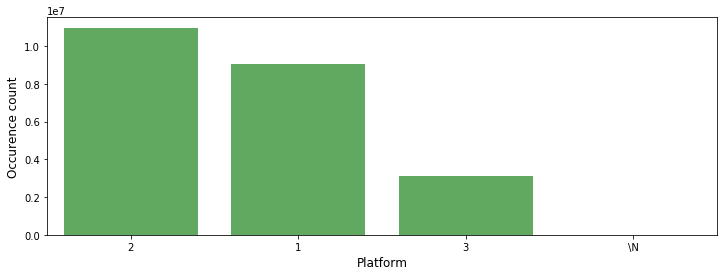

In [8]:
events_info.platform = events_info.platform.astype(str)
plat = events_info.platform.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(plat.index, plat.values, alpha=0.8, color=p[2])
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Occurence count', fontsize=12)

In [9]:
events_info['geo_location'] = events_info['geo_location'].apply(lambda x: str(x).split(">")[0])

In [10]:
events_info.head()

,display_id,uuid,document_id,timestamp,platform,geo_location
0,1,cb8c55702adb93,379743,61,3,US
1,2,79a85fa78311b9,1794259,81,2,US
2,3,822932ce3d8757,1179111,182,2,US
3,4,85281d0a49f7ac,1777797,234,2,US
4,5,8d0daef4bf5b56,252458,338,2,SG


### let's try to get some info about the users

uuid
ef7761dd22277c    38
45d23867dbe3b3    38
c0bd502c7a479f    42
2759b057797f02    46
b88553e3a2aa29    49
Name: uuid, dtype: int64
Users that appear less than 2 times: 88.42%
Users that appear less than 3 times: 97.02%
Users that appear less than 5 times: 99.51%
Users that appear less than 8 times: 99.91%
Users that appear less than 10 times: 99.96%
Users that appear less than 15 times: 99.99%


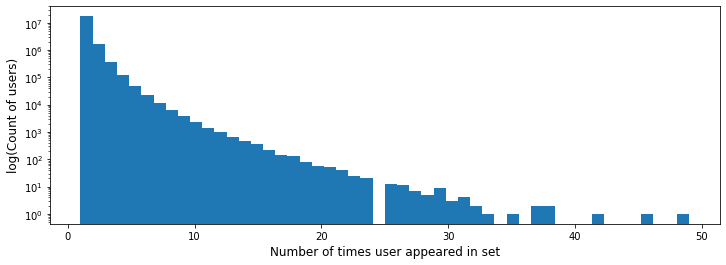

In [11]:
users_count = events_info.groupby('uuid')['uuid'].count().sort_values()

print(users_count.tail())

for i in [2,3,5,8,10,15]:
    print('Users that appear less than {} times: {}%'.format(i, round((users_count < i).mean() * 100, 2)))
    
plt.figure(figsize=(12, 4))
plt.hist(users_count.values, bins=50, log=True)
plt.xlabel('Number of times user appeared in set', fontsize=12)
plt.ylabel('log(Count of users)', fontsize=12)
plt.show()

In [65]:
promoted_content_csv = '../data/promoted_content.csv'
promoted_info = pd.read_csv(promoted_content_csv)

In [66]:
promoted_info.head()

,ad_id,document_id,campaign_id,advertiser_id
0,1,6614,1,7
1,2,471467,2,7
2,3,7692,3,7
3,4,471471,2,7
4,5,471472,2,7


4385 unique advertisers
34675 unique campaigns
advertiser_id
2         2
3        12
4       168
5        45
6        15
       ... 
4499      1
4501      1
4510     44
4516      1
4532     43
Name: advertiser_id, Length: 4385, dtype: int64


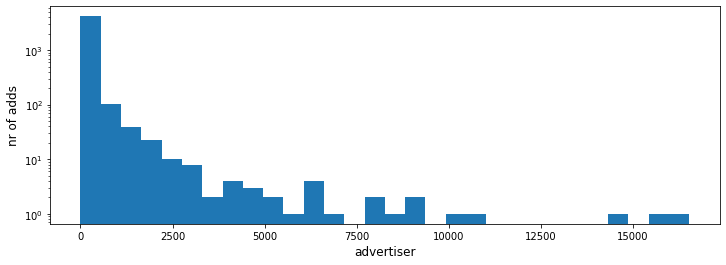

In [87]:
unique_advertisers = promoted_info['advertiser_id'].astype(int).unique()

print(str(len(unique_advertisers)) + ' unique advertisers')

unique_campaigns = promoted_info['campaign_id'].unique()
print(str(len(unique_campaigns)) + ' unique campaigns')

active_advertisers = promoted_info.groupby('advertiser_id')['advertiser_id'].count()
print(active_advertisers)

plt.figure(figsize=(12, 4))
plt.hist(active_advertisers.values, bins=30, log=True)
plt.xlabel('advertiser', fontsize=12)
plt.ylabel('nr of adds', fontsize=12)
plt.show()


### merge data : click with events. this operation is very expensive. so we will use it one by one inbetween different files, just for the safe of EDA, for training we will load the data in chunks. 

In [112]:
train_csv = '../data/clicks_train.csv'
train_data = pd.read_csv(train_csv)

In [ ]:
merged_train_data = train_data.merge(events_info, on="display_id", how="outer").fillna("")

In [113]:
#merged_train_data.info()
train_data.head()
#events_info.info()
#merged_train_data.head()

,display_id,ad_id,clicked
0,1,42337,0
1,1,139684,0
2,1,144739,1
3,1,156824,0
4,1,279295,0


In [34]:
merged_train_data["ad_id"].nunique() #unique advertisements ids
#events_info["document_id"].nunique()

478951

### merge also test data with events info

In [90]:
test_csv = '../data/clicks_test.csv'
test_data = pd.read_csv(test_csv)
merged_test_data = test_data.merge(events_info, on="display_id", how="outer").fillna("")

In [110]:
merged_test_data.tail(10)

,display_id,ad_id,uuid,document_id,timestamp,platform,geo_location
49099745,16874584,,94680f981bf165,2311552,1123198843,2,US
49099746,16874585,,6c23d6809274d4,479781,1123198914,2,CA
49099747,16874586,,1931d00a6f2830,2799635,1123199143,2,US
49099748,16874587,,f82df924309e8b,161824,1123199167,2,US
49099749,16874588,,1bf30bbd832319,2822648,1123199298,2,US
49099750,16874589,,d2c47d8183e37b,876520,1123199313,3,US
49099751,16874590,,4032cf074d74a3,2819923,1123199470,3,US
49099752,16874591,,49396799cb3a40,2816969,1123199601,1,US
49099753,16874592,,45f3b28fd8f19d,2823420,1123199635,2,GB
49099754,16874593,,21f03d8a66e702,2777166,1123199936,2,US


### read also test data to be able to check distribution against train data.

In [109]:
train_data.head()

AttributeError: 'TextFileReader' object has no attribute 'head'

In [93]:
test_data.info

<bound method DataFrame.info of           display_id   ad_id
0           16874594   66758
1           16874594  150083
2           16874594  162754
3           16874594  170392
4           16874594  172888
...              ...     ...
32225157    23120125  254698
32225158    23120126   57097
32225159    23120126  145293
32225160    23120126  201649
32225161    23120126  292363

[32225162 rows x 2 columns]>

### comparing the distribution on clicks vs hours, to check test vs. train data 

Text(0, 0.5, 'Proportion of set')

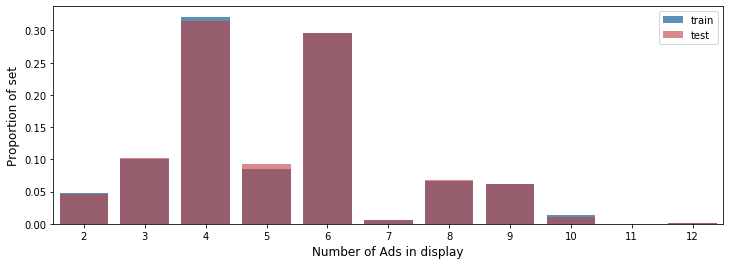

In [94]:
%matplotlib inline
train_ads_per_display = train_data.groupby('display_id')['ad_id'].count().value_counts()
test_ads_per_display = test_data.groupby('display_id')['ad_id'].count().value_counts()
train_ads_per_display = train_ads_per_display / np.sum(train_ads_per_display)
test_ads_per_display = test_ads_per_display / np.sum(test_ads_per_display)

plt.figure(figsize=(12,4))
sns.barplot(train_ads_per_display.index, train_ads_per_display.values, alpha=0.8, color=p[0], label='train')
sns.barplot(test_ads_per_display.index, test_ads_per_display.values, alpha=0.6, color=p[3], label='test')
plt.legend()
plt.xlabel('Number of Ads in display', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

### Add distribution per display seems to be ok.
### Now checking again the distribution per region.

Text(0, 0.5, 'Proportion of set')

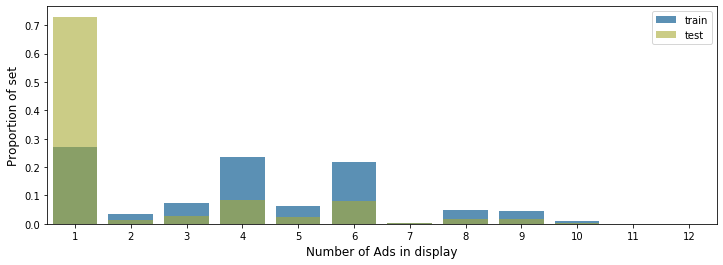

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
merged_train_data_disp = merged_train_data.groupby('display_id')['geo_location'].count().value_counts()
merged_test_data_disp = merged_test_data.groupby('display_id')['geo_location'].count().value_counts()
merged_train_data_disp = merged_train_data_disp / np.sum(merged_train_data_disp)
merged_test_data_disp = merged_test_data_disp / np.sum(merged_test_data_disp)

plt.figure(figsize=(12,4))
sns.barplot(merged_train_data_disp.index, merged_train_data_disp.values, alpha=0.8, color=p[0], label='train')
sns.barplot(merged_test_data_disp.index, merged_test_data_disp.values, alpha=0.6, color=p[8], label='test')
plt.legend()
plt.xlabel('Number of Ads in display', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

### so the distribution on geo_location in between test and dev is not quite the same

### A little bit of cleanup

In [96]:
import gc
try: del merged_train_data_disp, merged_test_data_disp, users_count, train_ads_per_display, test_ads_per_display, plat
except: pass;
gc.collect()

8559

### merge training data with promoted content info as well.

In [60]:
#TODO : this is too heavy. merge in chunks
#merged_train_data['ad_id_doc_id'] = merged_train_data['ad_id'].astype(str) + '_' + merged_train_data['document_id'].astype(str)
#promoted_info['ad_id_doc_id'] = promoted_info['ad_id'].astype(str) + '_' + promoted_info['document_id'].astype(str)
#merged_train_data = merged_train_data.merge(promoted_info, on="display_id", how="outer").fillna("")

In [97]:
merged_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93387264 entries, 0 to 93387263
Data columns (total 8 columns):
display_id      int64
ad_id           object
clicked         object
uuid            object
document_id     int64
timestamp       int64
platform        object
geo_location    object
dtypes: int64(3), object(5)
memory usage: 6.3+ GB


In [ ]:
#TODO : this is too heavy. merge in chunks
#merged_train_data = merged_train_data.merge(promoted_info, on="ad_id_doc_id", how="outer").fillna("")

### Based on the information so far, try to train an algorithm based on clicks and promoted content.

In [127]:
le = preprocessing.LabelEncoder()
le.fit(events_info['geo_location'])
le.transform(events_info['geo_location'])
events_info = events_info.apply(le.fit_transform)

events_info.head()

,display_id,uuid,document_id,timestamp,platform,geo_location
0,0,15471847,114960,0,2,214
1,1,8713862,506745,1,1,214
2,2,9415450,337381,2,1,214
3,3,9662179,499882,3,1,214
4,4,10314232,72024,4,1,187


In [ ]:
events_info.info()
events_dict = {}
for index, row in events_info.iterrows():
    events_dict[events_info.iloc[index]['display_id']] = (events_info['platform'], events_info['geo_location']) 

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

chunksize=10000# 87141731 is the total number, so it will take a while.
train_data_chunks = pd.read_csv('../data/clicks_train.csv', iterator=True,chunksize=chunksize) #Load data
print( 'Training')
i = 0

alg = RandomForestClassifier(random_state=1, n_estimators=3, min_samples_split=4, min_samples_leaf=2, warm_start=True)

for chunk in train_data_chunks:
    chunk=pd.merge(chunk,promoted_info,how='left',on='ad_id')
    chunk['platform'] = 
    #chunk = pd.merge(chunk, events_info, on="display_id", how="left").fillna("")
    predictors=[x for x in chunk.columns if x not in ['display_id','clicked', 'uuid', 'timestamp']]
    if i%100 == 0:
        print('processing chunk : ' + str(i))
        print(predictors)
    chunk=chunk.fillna(0.0)
    alg.fit(chunk[predictors], chunk["clicked"])#Fit the Algorithm
    i += 1

print('DONE training')

Training
processing chunk : 0
['ad_id', 'document_id', 'campaign_id', 'advertiser_id']
processing chunk : 100
['ad_id', 'document_id', 'campaign_id', 'advertiser_id']
processing chunk : 200
['ad_id', 'document_id', 'campaign_id', 'advertiser_id']
processing chunk : 300
['ad_id', 'document_id', 'campaign_id', 'advertiser_id']
processing chunk : 400
['ad_id', 'document_id', 'campaign_id', 'advertiser_id']
processing chunk : 500
['ad_id', 'document_id', 'campaign_id', 'advertiser_id']
processing chunk : 600
['ad_id', 'document_id', 'campaign_id', 'advertiser_id']
processing chunk : 700
['ad_id', 'document_id', 'campaign_id', 'advertiser_id']
processing chunk : 800
['ad_id', 'document_id', 'campaign_id', 'advertiser_id']
processing chunk : 900
['ad_id', 'document_id', 'campaign_id', 'advertiser_id']
processing chunk : 1000
['ad_id', 'document_id', 'campaign_id', 'advertiser_id']
processing chunk : 1100
['ad_id', 'document_id', 'campaign_id', 'advertiser_id']
processing chunk : 1200
['ad_id

KeyboardInterrupt: 